###### Reviewing Multi Armed bandit note from the following sources:
** https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c
** {Correspoding github}: https://github.com/ankonzoid/LearningX/blob/master/classical_RL/multiarmed_bandit/multiarmed_bandit.py

In [1]:
"""
 multiarmed_bandit.py  (author: Anson Wong / git: ankonzoid)
 We solve the multi-armed bandit problem using a classical epsilon-greedy
 agent with reward-average sampling as the estimate to action-value Q.
 This algorithm follows closely with the notation of Sutton's RL textbook.
 We set up bandit arms with fixed probability distribution of success,
 and receive stochastic rewards from each arm of +1 for success,
 and 0 reward for failure.
 The incremental update rule action-value Q for each (action a, reward r):
   n += 1
   Q(a) <- Q(a) + 1/n * (r - Q(a))
 where:
   n = number of times action "a" was performed
   Q(a) = value estimate of action "a"
   r(a) = reward of sampling action bandit (bandit) "a"
 Derivation of the Q incremental update rule:
   Q_{n+1}(a)
   = 1/n * (r_1(a) + r_2(a) + ... + r_n(a))
   = 1/n * ((n-1) * Q_n(a) + r_n(a))
   = 1/n * (n * Q_n(a) + r_n(a) - Q_n(a))
   = Q_n(a) + 1/n * (r_n(a) - Q_n(a))
"""

'\n multiarmed_bandit.py  (author: Anson Wong / git: ankonzoid)\n We solve the multi-armed bandit problem using a classical epsilon-greedy\n agent with reward-average sampling as the estimate to action-value Q.\n This algorithm follows closely with the notation of Sutton\'s RL textbook.\n We set up bandit arms with fixed probability distribution of success,\n and receive stochastic rewards from each arm of +1 for success,\n and 0 reward for failure.\n The incremental update rule action-value Q for each (action a, reward r):\n   n += 1\n   Q(a) <- Q(a) + 1/n * (r - Q(a))\n where:\n   n = number of times action "a" was performed\n   Q(a) = value estimate of action "a"\n   r(a) = reward of sampling action bandit (bandit) "a"\n Derivation of the Q incremental update rule:\n   Q_{n+1}(a)\n   = 1/n * (r_1(a) + r_2(a) + ... + r_n(a))\n   = 1/n * ((n-1) * Q_n(a) + r_n(a))\n   = 1/n * (n * Q_n(a) + r_n(a) - Q_n(a))\n   = Q_n(a) + 1/n * (r_n(a) - Q_n(a))\n'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
class Environment:

    def __init__(self, probs):
        self.probs = probs  # success probabilities for each arm

    def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        return 1 if (np.random.random()  < self.probs[action]) else 0

In [4]:
class Agent:

    def __init__(self, nActions, eps):
        self.nActions = nActions
        self.eps = eps
        self.n = np.zeros(nActions, dtype=np.int) # action counts n(a)
        self.Q = np.zeros(nActions, dtype=np.float) # value Q(a)

    def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

    def get_action(self):
        # Epsilon-greedy policy
        if np.random.random() < self.eps: # explore
            return np.random.randint(self.nActions)
        else: # exploit
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

In [5]:
# Start multi-armed bandit simulation
def experiment(probs, N_episodes):
    env = Environment(probs) # initialize arm probabilities
    agent = Agent(len(env.probs), eps)  # initialize agent
    actions, rewards = [], []
    for episode in range(N_episodes):
        action = agent.get_action() # sample policy
        reward = env.step(action) # take step + get reward
        agent.update_Q(action, reward) # update Q
        actions.append(action)
        rewards.append(reward)
    return np.array(actions), np.array(rewards)


In [6]:
# Settings
probs = [0.10, 0.50, 0.60, 0.80, 0.10,
         0.25, 0.60, 0.45, 0.75, 0.65] # bandit arm probabilities of success
N_experiments = 10000 # number of experiments to perform
N_steps = 500 # number of steps (episodes)
eps = 0.1 # probability of random exploration (fraction)
save_fig = True # save file in same directory
output_dir = os.path.join(os.getcwd(), "output")

In [7]:
# Run multi-armed bandit experiments
print("Running multi-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))
R = np.zeros((N_steps,))  # reward history sum
A = np.zeros((N_steps, len(probs)))  # action history sum
for i in range(N_experiments):
    actions, rewards = experiment(probs, N_steps)  # perform experiment
    if (i + 1) % (N_experiments / 100) == 0:
        print("[Experiment {}/{}] ".format(i + 1, N_experiments) +
              "n_steps = {}, ".format(N_steps) +
              "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    R += rewards
    for j, a in enumerate(actions):
        A[j][a] += 1

Running multi-armed bandits with nActions = 10, eps = 0.1
[Experiment 100/10000] n_steps = 500, reward_avg = 0.716
[Experiment 200/10000] n_steps = 500, reward_avg = 0.772
[Experiment 300/10000] n_steps = 500, reward_avg = 0.718
[Experiment 400/10000] n_steps = 500, reward_avg = 0.734
[Experiment 500/10000] n_steps = 500, reward_avg = 0.648
[Experiment 600/10000] n_steps = 500, reward_avg = 0.674
[Experiment 700/10000] n_steps = 500, reward_avg = 0.668
[Experiment 800/10000] n_steps = 500, reward_avg = 0.668
[Experiment 900/10000] n_steps = 500, reward_avg = 0.738
[Experiment 1000/10000] n_steps = 500, reward_avg = 0.704
[Experiment 1100/10000] n_steps = 500, reward_avg = 0.738
[Experiment 1200/10000] n_steps = 500, reward_avg = 0.632
[Experiment 1300/10000] n_steps = 500, reward_avg = 0.75
[Experiment 1400/10000] n_steps = 500, reward_avg = 0.662
[Experiment 1500/10000] n_steps = 500, reward_avg = 0.752
[Experiment 1600/10000] n_steps = 500, reward_avg = 0.744
[Experiment 1700/10000] 

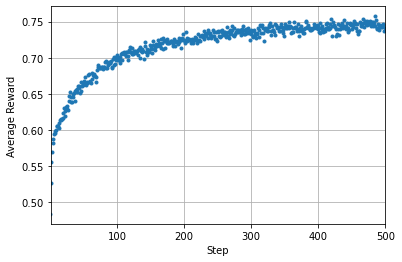

In [12]:
%matplotlib inline
R_avg =  R / np.float(N_experiments)
plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
ax = plt.gca()
plt.xlim([1, N_steps])
if save_fig:
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    plt.savefig(os.path.join(output_dir, "rewards.png"), bbox_inches="tight")
else:
    plt.show()

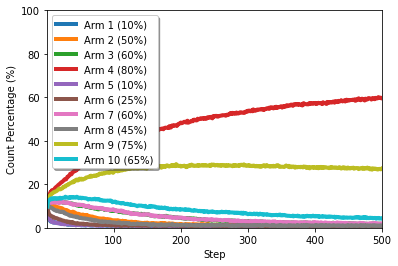

In [13]:
# Plot action results
for i in range(len(probs)):
    A_pct = 100 * A[:,i] / N_experiments
    steps = list(np.array(range(len(A_pct)))+1)
    plt.plot(steps, A_pct, "-",
             linewidth=4,
             label="Arm {} ({:.0f}%)".format(i+1, 100*probs[i]))
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
leg = plt.legend(loc='upper left', shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
if save_fig:
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    plt.savefig(os.path.join(output_dir, "actions.png"), bbox_inches="tight")
else:
    plt.show()